In [1]:
import pandas as pd
import scipy as scp
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [2]:
park_train = pd.read_table('parkinsonsTrainStatML.dt', header = None, sep = ' ')
park_test = pd.read_table('parkinsonsTestStatML.dt', header = None, sep = ' ')

In [3]:
park_train_labels = park_train.iloc[:,-1].values
park_train = park_train.iloc[:,:-1].values
park_test_labels = park_test.iloc[:,-1].values
park_test = park_test.iloc[:,:-1].values

In [4]:
normalize = preprocessing.StandardScaler().fit(park_train)

In [5]:
x_train = normalize.transform(park_train)
y_train = park_train_labels
x_test = normalize.transform(park_test)
y_test = park_test_labels

In [6]:
param_grid = {'C' : scp.logspace(-2,4,7, base=b), 'gamma' : scp.logspace(-4,2,7,base=b)}

In [7]:
clf = GridSearchCV(SVC(kernel = 'rbf'), param_grid)

In [8]:
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02,   1.00000e+03,   1.00000e+04]), 'gamma': array([  1.00000e-04,   1.00000e-03,   1.00000e-02,   1.00000e-01,
         1.00000e+00,   1.00000e+01,   1.00000e+02])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [9]:
1 - sum(abs(clf.predict(x_test) - y_test))/len(y_test)

0.90721649484536082

In [10]:
cross_results = pd.DataFrame(clf.cv_results_)[['mean_test_score','params']]
cross_results['C'] = cross_results.params.apply(lambda d : d['C'])
cross_results['gamma'] = cross_results.params.apply(lambda d : d['gamma'])
cross_results = cross_results.rename(columns = {'mean_test_score' : 'mean_val_score'})
cross_results = cross_results.drop('params', axis=1)
cross_results = cross_results.pivot(index = 'C', columns = 'gamma', values = 'mean_val_score')

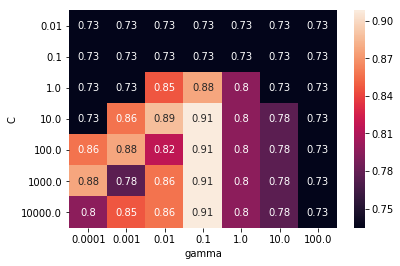

In [11]:
heatmap = sns.heatmap(cross_results, annot = True)
heatmap = heatmap.get_figure()
heatmap.savefig('cv_heatmap.jpg', bbox_inches='tight')

In [12]:
clf.best_params_, clf.best_score_

({'C': 10.0, 'gamma': 0.10000000000000001}, 0.90816326530612246)

In [12]:
def make_norm_table(before, after, name) :
    table = pd.DataFrame({'mean' : scp.mean(before, axis = 0), 
                          'std' : scp.std(before, axis = 0),
                          'norm. mean' : scp.mean(after, axis = 0),
                          'norm. std' : scp.std(after, axis = 0)},
                          index = range(1,23))
    table.index.name = 'Feat.'
    cols = table.columns
    cols = scp.array([cols[0], cols[3], cols[1], cols[2]])
    table = table[cols]
    table = table.reset_index()
    table = table.round(4)
    table['norm. mean'] = abs(table['norm. mean'])
    table.to_latex(buf=name, index=False)

In [14]:
make_norm_table(park_train,x_train,'train_norm_table.tex')

In [13]:
make_norm_table(park_test, x_test, 'test_norm_table.tex')